In [92]:
import numpy as np
import pandas as pd
import scipy as sp

#za prikaz podataka
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
import pkg_resources
import sys

#PROVJERA DAL JE INSTALIRANO SVE DOBRO
print("python ==" + str(sys.version_info) +
      "\nnumpy == " + pkg_resources.get_distribution("numpy").version +
      "\npandas == " + pkg_resources.get_distribution("pandas").version +
      "\nscipy == " + pkg_resources.get_distribution("scipy").version)


python ==sys.version_info(major=3, minor=5, micro=5, releaselevel='final', serial=0)
numpy == 1.16.2
pandas == 0.24.2
scipy == 1.2.1


In [98]:
#DA BI SE POKAZIVALA CELI DATA FRAME
pd.set_option("display.max_rows", None, "display.max_columns", None)

#UCITAVANJE PODATAK
df = pd.read_csv("train.csv")

#df

In [99]:
#PRAVLJENJE DUMMIES KLASA ZA ONE HOT ENCODING
sex_dummy = pd.get_dummies(df.sex)
address_dummy = pd.get_dummies(df.address)
famsize_dummy = pd.get_dummies(df.famsize)
pstatus_dummy = pd.get_dummies(df.Pstatus)
reason_dummy = pd.get_dummies(df.reason)
guardian_dummy = pd.get_dummies(df.guardian)
schoolsup_dummy = pd.get_dummies(df.schoolsup)
famsup_dummy = pd.get_dummies(df.famsup)
paid_dummy = pd.get_dummies(df.paid)
activities_dummy = pd.get_dummies(df.activities)
higher_dummy = pd.get_dummies(df.higher)
internet_dummy = pd.get_dummies(df.internet)
romantic_dummy = pd.get_dummies(df.romantic)

In [100]:
#SVE MERGOVANO TREBA DA SE IZBACI NEPOTREBNO DA SE IZBJEGNE DUMMY TRAP
merged = pd.concat([df,sex_dummy,address_dummy,famsize_dummy,pstatus_dummy,reason_dummy,
                    guardian_dummy,schoolsup_dummy,famsup_dummy,paid_dummy,activities_dummy,
                    higher_dummy,internet_dummy,romantic_dummy],axis='columns')

In [101]:
#PRAVLJENJE DUMMY DATA FRAMOVA I IZBACIVANJE PO JEDNE KOLONE IZ SVAKOG KAKO
#BI SE IZBEGAO DUMMY TRAP
sex_dummy = pd.get_dummies(df.sex)
sex_dummy_dropped_one = sex_dummy.drop(['F'], axis='columns')
sex_dummy_dropped_one.columns = ['sex_M']

address_dummy = pd.get_dummies(df.address)
address_dummy_dropped_one = address_dummy.drop(['R'], axis='columns')
address_dummy_dropped_one.columns = ['addres_U']

famsize_dummy = pd.get_dummies(df.famsize)
famsize_dummy_dropped_one = famsize_dummy.drop(['LE3'], axis='columns')
famsize_dummy_dropped_one.columns = ['famsize_GT3']

pstatus_dummy = pd.get_dummies(df.Pstatus)
pstatus_dummy_dropped_one = pstatus_dummy.drop(['A'], axis='columns')
pstatus_dummy_dropped_one.columns = ['pstatus_T']

reason_dummy = pd.get_dummies(df.reason)
reason_dummy_dropped_one = reason_dummy.drop(['other'], axis='columns')
reason_dummy_dropped_one.columns = ['reason_home', 'reason_reputation', 'reason_course']

guardian_dummy = pd.get_dummies(df.guardian)
guardian_dummy_dropped_one = guardian_dummy.drop(['other'], axis='columns')
guardian_dummy_dropped_one.columns = ['guardian_mother', 'guardian_father']

schoolsup_dummy = pd.get_dummies(df.schoolsup)
schoolsup_dummy_dropped_one = schoolsup_dummy.drop(['no'], axis='columns')
schoolsup_dummy_dropped_one.columns = ['schoolsup_yes']

famsup_dummy = pd.get_dummies(df.famsup)
famsup_dummy_dropped_one = famsup_dummy.drop(['no'], axis='columns')
famsup_dummy_dropped_one.columns = ['famsup_yes']

paid_dummy = pd.get_dummies(df.paid)
paid_dummy_dropped_one = paid_dummy.drop(['no'], axis='columns')
paid_dummy_dropped_one.columns = ['paid_yes']

activities_dummy = pd.get_dummies(df.activities)
activities_dummy_dropped_one = activities_dummy.drop(['no'], axis='columns')
activities_dummy_dropped_one.columns = ['activities_yes']

higher_dummy = pd.get_dummies(df.higher)
higher_dummy_dropped_one = higher_dummy.drop(['no'], axis='columns')
higher_dummy_dropped_one.columns = ['higher_yes']

internet_dummy = pd.get_dummies(df.internet)
internet_dummy_dropped_one = internet_dummy.drop(['no'], axis='columns')
internet_dummy_dropped_one.columns = ['internet_yes']

romantic_dummy = pd.get_dummies(df.romantic)
romantic_dummy_dropped_one = romantic_dummy.drop(['no'], axis='columns')
romantic_dummy_dropped_one.columns = ['romantic_yes']

In [102]:
#MERGOVANJE DUMMY DATA FRAMOVA SA PODACIMA
merged = pd.concat([df,sex_dummy_dropped_one,address_dummy_dropped_one,famsize_dummy_dropped_one,
                   pstatus_dummy_dropped_one,reason_dummy_dropped_one,guardian_dummy_dropped_one,
                   schoolsup_dummy_dropped_one,famsup_dummy_dropped_one,paid_dummy_dropped_one,
                   activities_dummy_dropped_one,higher_dummy_dropped_one,internet_dummy_dropped_one,
                   romantic_dummy_dropped_one], axis = 'columns')

#IZBACIVANJE KOLONA OD KOJE SU IZVEDENE DUMMY DATA FRAMOVI
final_df = merged.drop(['sex','address','famsize', 'Pstatus','reason',
                        'guardian','schoolsup','famsup','paid','activities',
                        'higher','internet','romantic'], axis='columns')

#final_df = take_out_0_1(final_df)
#final_df

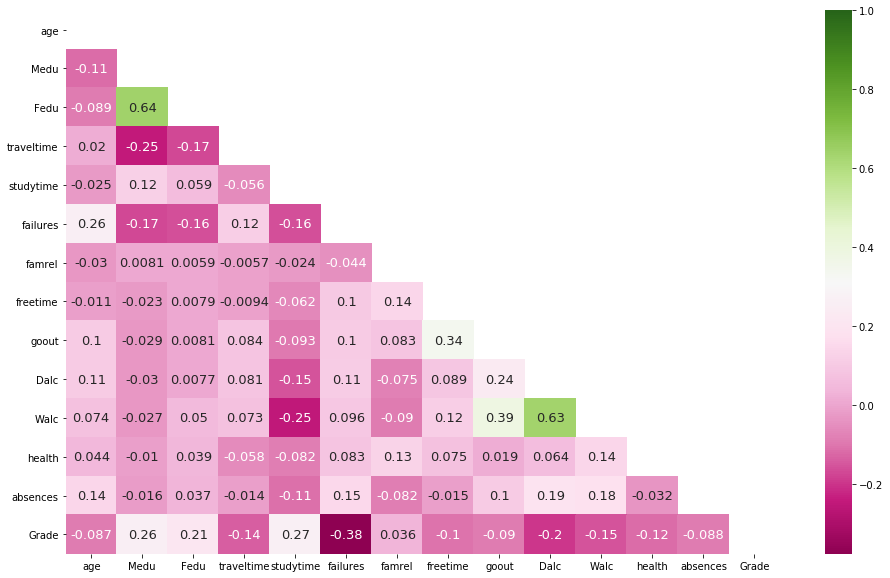

In [103]:
#Izbacivanje kategorijskih podatak iz dataframe za prikazivanje korelacije
heatmap_view = final_df.drop(['sex_M','addres_U','famsize_GT3','pstatus_T','reason_home', 'reason_reputation',
'reason_course','guardian_mother', 'guardian_father','schoolsup_yes','famsup_yes',
'paid_yes','activities_yes','higher_yes','internet_yes','romantic_yes'], axis='columns')

#ISCRTAVANJE HEAT MAPE RADI ANALIZE PODATAKA
corr = heatmap_view.corr()
mask = np.zeros_like(heatmap_view.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True

plt.figure(figsize=(16,10))
sns.heatmap(heatmap_view.corr(),cmap="PiYG", mask=mask, annot=True, annot_kws={"size" : 13})

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


Text(0, 0.5, '')

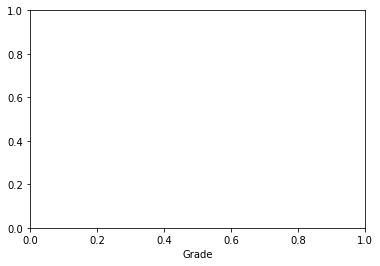

In [104]:
#ISCRTAVANJE JEDNOG PO JEDNOG PLOTA DA SE VIDI DA LI IMA OUTLIERA
%matplotlib inline
plt.xlabel('Grade')
plt.ylabel('')
#plt.scatter(df.Grade,df.sex, color='red', marker='+')
#plt.scatter(df.Grade,df.address, color='red', marker='+')
#plt.scatter(df.Grade,df.famsize, color='red', marker='+')
#plt.scatter(df.Grade,df.Pstatus, color='red', marker='+')
#plt.scatter(df.Grade,df.reason, color='red', marker='+')
#plt.scatter(df.Grade,df.guardian, color='red', marker='+')
##plt.scatter(df.Grade,df.schooolsup, color='red', marker='+')
#plt.scatter(df.Grade,df.famsup, color='red', marker='+')
#plt.scatter(df.Grade,df.paid, color='red', marker='+')
#plt.scatter(df.Grade,df.activities, color='red', marker='+')
#plt.scatter(df.Grade,df.higher, color='red', marker='+')
#plt.scatter(df.Grade,df.internet, color='red', marker='+')
#plt.scatter(df.Grade,df.romantic, color='red', marker='+')


#plt.scatter(df.age,df.Grade, color='red', marker='+')
#plt.scatter(df.Medu,df.Grade, color='red', marker='+')
#plt.scatter(df.Grade,df.Fedu, color='red', marker='+')
#plt.scatter(df.Grade,df.traveltime, color='red', marker='+')
#plt.scatter(df.Grade,df.studytime, color='red', marker='+')
#plt.scatter(df.Grade,df.failures, color='red', marker='+')
#plt.scatter(df.Grade,df.famrel, color='red', marker='+')
#plt.scatter(df.Grade,df.goout, color='red', marker='+')
#plt.scatter(df.Grade,df.Dalc, color='red', marker='+')
#plt.scatter(df.Grade,df.Walc, color='red', marker='+')
#plt.scatter(df.Grade,df.health, color='red', marker='+')
##plt.scatter(df.Grade,df.absence, color='red', marker='+')

In [161]:
from random import seed
from random import randrange

# Split a dataset into a train and test set
def train_test_split_random(dataset, data_size,split=0.7):
    
    train_size_counter = 0
    indices = []
    train = pd.DataFrame()
    train_size = 0.6 * data_size
    dataframe_copy = dataset
    while train_size_counter < train_size:
        train_size_counter = train_size_counter + 1
        index = randrange(data_size)
        indices.append(index)
    
    for i in range(len(indices)):
        train = train.append(dataframe_copy.iloc[[i]])
        
    dataframe_copy.drop(labels = indices, axis=0)
    
    return train, dataframe_copy
    
#SORTED 80/20    
def train_test_split_sorted(dataset, data_size):
    
    sorted_df = dataset.sort_values(by=['Grade'])
    train_counter = 1
    indices = []
    train = pd.DataFrame()
    dataframe_copy = dataset
    
    for i in range(data_size):
        if train_counter == 5:
            indices.append(i)
            train_counter = 1
        
        train_counter = train_counter + 1
        
    for i in range(len(indices)):
        train = train.append(dataframe_copy.iloc[[i]])
        
    dataframe_copy.drop(labels = indices, axis=0)
    
    return train, dataframe_copy      




#TRAIN TEST SPLIT
#seed(1)
#train, test = train_test_split_random(final_df, final_df[final_df.columns[0]].count() -1)

train, test = train_test_split_sorted(final_df, final_df[final_df.columns[0]].count() -1)
train

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,Grade,sex_M,addres_U,famsize_GT3,pstatus_T,reason_home,reason_reputation,reason_course,guardian_mother,guardian_father,schoolsup_yes,famsup_yes,paid_yes,activities_yes,higher_yes,internet_yes,romantic_yes
0,15,4,2,1,3,0,5,3,3,1,3,1,4,15,0,1,1,1,0,0,1,0,1,0,1,0,1,1,1,0
1,16,1,1,4,4,0,4,3,2,1,1,1,0,13,0,0,1,1,0,1,0,1,0,0,1,0,0,1,1,0
2,17,4,2,2,3,0,4,3,3,1,1,3,0,16,0,1,1,1,0,0,1,0,1,0,1,0,0,1,1,0
3,15,1,2,1,2,0,3,2,3,1,2,1,0,14,0,1,1,1,1,0,0,0,1,0,0,0,0,1,1,0
4,17,4,3,1,3,0,4,4,3,1,3,4,0,13,0,1,1,1,0,0,1,0,1,0,1,0,1,1,1,1
5,16,2,2,1,2,0,4,3,5,2,4,4,0,11,1,1,1,1,1,0,0,1,0,0,0,0,0,0,1,0
6,16,1,1,4,2,0,5,1,3,1,1,3,0,13,0,0,1,1,1,0,0,0,1,0,1,0,0,1,0,0
7,16,2,2,2,4,0,5,3,5,1,1,5,6,13,0,0,1,1,0,0,1,0,1,0,1,0,1,1,1,0
8,17,3,2,2,2,0,1,2,3,1,2,5,0,15,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1
9,19,3,3,1,2,0,4,5,3,1,2,5,0,11,1,0,1,1,0,0,1,1,0,0,0,0,1,1,0,1


In [56]:
#DA IZBACI 0 I 1 DA NE DOBIJEMO POGRESNE REZULTATE JER SE MOGU SMATRATI OUTLIERIMA
def take_out_0_1(df):
    indices = []
    for index, row in df.iterrows():
        x = row['Grade']
        if x == 0 or x == 1:
            indices.append(index)
    
    data = df.drop(labels=indices, axis=0)
    return data